## Assignment 4
## Supervised Machine Learning
## Group 8 (Brandon Yim, Hamed Ayman, Felix Cazarez)
### Chapter 6: Sentiment analysis

### a) [1 mark] Imagine a movie production company wants to use a sentiment analysis model to identify positive/negative reviews of their movies. Which is worse for this use case, a false positive or a false negative, or are they equally bad? What value of β would be suitable for an Fβ score? 

In this scenario, we have two possible outcomes: 
Good comments are correctly identified as good comments (True Positive), or 
Bad comments are correctly identified as bad comments (True Negative). 

However, there are also two possible errors that can occur: 
A good comment is mistakenly identified as bad (False Negative), or 
A bad comment is mistakenly identified as good (False Positive).

#### Of these two errors, the False Negative is the most critical as it can lead to the production company losing money, even if they have a good product. This occurs when a good comment is mistakenly identified as bad, leading the company to take the movie out of circulation and lose potential revenue.

To address this issue, we should prioritize Recall over Precision. Recall is the proportion of actual positives that are correctly identified as such, and it is crucial in this context because we want to minimize the number of False Negatives. 
However, Precision is still important to consider because a high number of False Positives can also reduce profits by leading the company to continue selling a movie that nobody watches.

#### To balance these two metrics, we could use a beta of 2. 

This value would give more weight to Recall and help to reduce the number of False Negatives. However, we should also aim to maintain a reasonable level of Precision to avoid the negative consequences of False Positives.


### b) [6 marks] Clean the data so that it is better suited for sentiment analysis, according to your ideas in problem 1h. 
### Add a markdown cell to explain what you are doing. Choose one of two ways to prepare the data:
### i) Make of copy of the IMBD_Dataset.csv and name it IMBD_Dataset_mod.csv. Open the file in Jupyter Hub and use “find and replace” to clean the text data. --OR--


Using the find and replace function is not scalable and no evidence of the work step by step can be shown. So, I decided to create a function to clean all data at once. 

In [58]:
# import libraries
import turicreate as tc
import utils
import re
import matplotlib.pyplot as plt

In [2]:
#import Dataset named as mod
movies_sf = tc.SFrame('./IMDB_Dataset_mod.csv')
movies_sf

Finished parsing file /home/ubuntu/IMDB_Dataset_mod.csv

Parsing completed. Parsed 100 lines in 6.00994 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 39624 lines. Lines per second: 13445.3

Finished parsing file /home/ubuntu/IMDB_Dataset_mod.csv

Parsing completed. Parsed 50000 lines in 3.21843 secs.

review,sentiment
One of the otherreviewers has mentioned ...,positive
A wonderful littleproduction. <br /><br ...,positive
I thought this was awonderful way to spend ...,positive
Basically there's afamily where a little ...,negative
"Petter Mattei's ""Love inthe Time of Money"" is a ...",positive
"Probably my all-timefavorite movie, a story ...",positive
I sure would like to seea resurrection of a up ...,positive
"This show was an amazing,fresh & innovative idea ...",negative
Encouraged by thepositive comments about ...,negative
If you like original gutwrenching laughter you ...,positive


### ii) Load the original dataset into a dataframe and use the regex Python library to clean the text data.


In [3]:
#create a function to clean the data

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def clean_text(text):
    # remove HTML tags and convert to lowercase
    text = re.sub(r'<.*?>', '', text).lower()
    # remove punctuation marks
    text = re.sub(r'[^\w\s]', '', text)
    # remove numbers
    text = re.sub(r'\d+', '', text)
    # remove words with 1 or two characters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    # remove stopwords
    stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)
    # remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [4]:
#apply the functcion to the reviews columns in Sframe
movies_sf['review'] = movies_sf['review'].apply(lambda x: clean_text(x))

In [5]:
# take a look at reviews 
print(movies_sf['review'][0])

one reviewers mentioned watching episode youll hooked right exactly happened methe first thing struck brutality unflinching scenes violence set right word trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle class inmates turned 


### c) [2 marks] Load the cleaned data and labels into an SFrame. 
### Add a column named ‘words’ to the SFrame that stores the count of each word used in each review. Print the SFrame.


In [6]:
movies_sf['words'] = tc.text_analytics.count_words(movies_sf['review'])
movies_sf

review,sentiment,words
one reviewers mentionedwatching episode youll ...,positive,"{'darker': 1.0, 'touch':1.0, 'viewingthats': ..."
wonderful littleproduction filming ...,positive,"{'terribly': 1.0,'surface': 1.0, ..."
thought wonderful wayspend time hot summer ...,positive,"{'see': 1.0, 'superman':1.0, 'interesting': 1.0, ..."
basically theres familylittle boy jake thinks ...,negative,"{'ignore': 1.0,'dialogs': 1.0, 'spots': ..."
petter matteis love timemoney visually stunning ...,positive,"{'work': 1.0,'anxiously': 1.0, ..."
probably alltime favoritemovie story selflessness ...,positive,"{'theyd': 1.0, 'thumbs':1.0, 'dozen': 1.0, ..."
sure would like seeresurrection dated ...,positive,"{'lets': 1.0, 'quitif':1.0, 'must': 1.0, ..."
show amazing freshinnovative idea first ...,negative,"{'awful': 1.0, 'success':1.0, 'made': 1.0, ..."
encouraged positivecomments film looking ...,negative,"{'obsessives': 1.0,'effort': 1.0, 'bit': ..."
like original gutwrenching laughter like ...,positive,"{'mom': 1.0, 'like': 2.0,'camp': 1.0, 'original': ..."


### d) [1 mark] Split the data into training/validation/testing sets using 80%/10%/10% respectively.


In [8]:
#splitting training 80%
train, validate_test = movies_sf.random_split(0.8, seed=0, exact=True)
# splitting validate and test from validate_test 20%
validate, test = validate_test.random_split(0.5, seed=0, exact=True)

In [9]:
# check rows of train, validate and test data
print(f'train shape: {train.shape} validate_shape:{validate.shape} test_shape{test.shape}')
# take a look the training data
train.head()

train shape: (40000, 3) validate_shape:(5000, 3) test_shape(5000, 3)


review,sentiment,words
one reviewers mentionedwatching episode youll ...,positive,"{'darker': 1.0, 'touch':1.0, 'viewingthats': ..."
wonderful littleproduction filming ...,positive,"{'terribly': 1.0,'surface': 1.0, ..."
thought wonderful wayspend time hot summer ...,positive,"{'see': 1.0, 'superman':1.0, 'interesting': 1.0, ..."
petter matteis love timemoney visually stunning ...,positive,"{'work': 1.0,'anxiously': 1.0, ..."
probably alltime favoritemovie story selflessness ...,positive,"{'theyd': 1.0, 'thumbs':1.0, 'dozen': 1.0, ..."
sure would like seeresurrection dated ...,positive,"{'lets': 1.0, 'quitif':1.0, 'must': 1.0, ..."
show amazing freshinnovative idea first ...,negative,"{'awful': 1.0, 'success':1.0, 'made': 1.0, ..."
like original gutwrenching laughter like ...,positive,"{'mom': 1.0, 'like': 2.0,'camp': 1.0, 'original': ..."
saw movie came recallscariest scene big bird ...,negative,"{'scary': 1.0, 'make':1.0, 'screenwriters': ..."
big fan bolls work manyenjoyed movie postal ...,negative,"{'minutes': 1.0,'annoying': 1.0, 'ahe ..."


In [10]:
#take a look at head of validating
validate.head()

review,sentiment,words
basically theres familylittle boy jake thinks ...,negative,"{'ignore': 1.0,'dialogs': 1.0, 'spots': ..."
encouraged positivecomments film looking ...,negative,"{'obsessives': 1.0,'effort': 1.0, 'bit': ..."
phil alien one quirkyfilms humour based ar ...,negative,"{'pretty': 2.0,'problem': 1.0, 'bett ..."
awful film must realstinkers nominated go ...,negative,"{'rest': 1.0, 'favored':1.0, 'theyd': 1.0, ..."
film tried many thingsstinging political sa ...,negative,"{'cause': 1.0, 'genuine':1.0, 'trivializes': 1.0, ..."
movie frustratingeverything seemed ...,negative,"{'badness': 1.0, 'full':1.0, 'bad': 1.0, 'lea ..."
average surprisingly tamefulci giallo means still ...,negative,"{'limping': 1.0,'wherever': 1.0, 'clu ..."
bela lugosi appearedseveral low budget ...,positive,"{'stars': 1.0,'especially': 1.0, ..."
really like salman kahnreally disappointed seen ...,negative,"{'next': 1.0, 'hope':1.0, 'wore': 1.0, ..."
honestly short film sucksdummy used necro scene ...,negative,"{'future': 1.0, 'keep':1.0, 'forgive': 1.0, ..."


In [11]:
#take a look at head of testing 
test.head()

review,sentiment,words
kind drawn erotic scenesrealize one amateurish ...,negative,"{'starving': 1.0,'spent': 1.0, 'money': ..."
war movie hollywood genredone redone many times ...,positive,"{'altogether': 1.0,'also': 1.0, 'sure': ..."
one significant quotesentire film pronounced ...,positive,"{'loss': 1.0, 'others':1.0, 'bellastyle': 1.0, ..."
movie based book manysplendored thing han ...,positive,"{'shining': 1.0,'stories': 1.0, ..."
disclaimer ive seen movietimes last years saw ...,positive,"{'singers': 1.0,'dubbed': 1.0, 'talki ..."
film could classifieddrama idea john voight ...,negative,"{'one': 1.0, 'taste':1.0, 'offended': 1.0, ..."
preston sturgis powerglory unseen public ...,positive,"{'depression': 1.0,'social': 1.0, 'reali ..."
percent nations nitwitsstill support bush would ...,negative,"{'guillotine': 1.0,'sent': 1.0, 'shot': ..."
busty beauty stacierandall plays pvc clad ...,negative,"{'quotient': 1.0, 'high':1.0, 'earlier': 1.0, ..."
thought mukhsinwonderfully written ...,positive,"{'cinema': 1.0, 'make':1.0, 'eyes': 1.0, 'ta ..."


### e) [3 marks] Use Turicreate to create logistic classifiers for sentiment analysis. 
### Be sure to use your validation set in the training. Experiment with different values of hyperparameters to develop two different models.


In [12]:
#training model 1
model1 = tc.logistic_classifier.create(train, features=['words'], target='sentiment', validation_set = validate )

Logistic regression:

--------------------------------------------------------

Number of examples          : 40000

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 185883

Number of coefficients      : 185884

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 2.330799     | 0.960175          | 0.855800            |

| 1         | 4        | 1.000000  | 3.477202     | 0.988150          | 0.864000            |

| 2         | 5        | 1.000000  | 4.119755     | 0.993275          | 0.875600            |

| 3         | 6        | 1.000000  | 4.935866     | 0.996725          | 0.876800            |

| 4         | 7        | 1.000000  | 5.675573     | 0.998475          | 0.876600            |

| 9         | 12       | 1.000000  | 9.066252     | 0.999875          | 0.851600            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [13]:
# model 1
model1

Class                          : LogisticClassifier

Schema
------
Number of coefficients         : 185884
Number of examples             : 40000
Number of classes              : 2
Number of feature columns      : 1
Number of unpacked features    : 185883

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : lbfgs
Solver iterations              : 10
Solver status                  : Completed (Iteration limit reached).
Training time (sec)            : 4.7874

Settings
--------
Log-likelihood                 : 56.8061

Highest Positive Coefficients
-----------------------------
words[familywhy]               : 55.172
words[donebesides]             : 55.172
words[goalsjake]               : 55.172
words[topthere]                : 27.7836
words[freshlyundead]           : 22.3195

Lowest Negative Coefficients
----------------------------
words[shtit]                   : -

In [15]:
#model1 coefficients
model1.coefficients

name,index,class,value,stderr
(intercept),None,positive,0.13288320972973905,None
words,darker,positive,0.6771963591556818,None
words,touch,positive,0.18789706570545342,None
words,viewingthats,positive,0.6947293184605049,None
words,may,positive,0.15111360728885198,None
words,skills,positive,-0.18019971782816074,None
words,street,positive,0.0992595886932757,None
words,turned,positive,-0.4976521441843082,None
words,middle,positive,-0.3362292853657024,None
words,mannered,positive,0.014345814136824142,None


In [17]:
# model 1 testing
model1_test = tc.logistic_classifier.create(test, features=['words'], target='sentiment', validation_set = None )
model1_test
model1_test.coefficients

Logistic regression:

--------------------------------------------------------

Number of examples          : 5000

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 53357

Number of coefficients      : 53358

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy |

+-----------+----------+-----------+--------------+-------------------+

| 0         | 2        | 1.000000  | 0.380335     | 0.989400          |

| 1         | 4        | 1.000000  | 0.538306     | 0.998400          |

| 2         | 5        | 1.000000  | 0.606171     | 0.999400          |

| 3         | 6        | 1.000000  | 0.681329     | 0.999600          |

| 4         | 7        | 1.000000  | 0.778725     | 0.999800          |

| 9         | 13       | 1.000000  | 1.445653     | 1.000000          |

+-----------+----------+-----------+--------------+-------------------+

name,index,class,value,stderr
(intercept),None,positive,0.07237296803902171,None
words,starving,positive,-0.3827806693456639,None
words,spent,positive,-0.0717092143555601,None
words,money,positive,-0.4783203346603039,None
words,wasted,positive,-0.7658659770385176,None
words,bad,positive,-0.31624931287797997,None
words,miles,positive,-0.040336144296468646,None
words,could,positive,-0.12028570875191463,None
words,million,positive,-0.20818813707119033,None
words,give,positive,0.017209981118935305,None


In [19]:
#model 2 train validate
model2 = tc.logistic_classifier.create(train
                                       , features=['words']
                                       , target='sentiment'
                                       , l1_penalty = 0.01
                                       , l2_penalty = 0.1
                                       , max_iterations = 100
                                       , solver = 'auto'
                                       , validation_set = validate )
model2
model2.coefficients

Logistic regression:

--------------------------------------------------------

Number of examples          : 40000

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 185883

Number of coefficients      : 185884

Starting Accelerated Gradient (FISTA)

--------------------------------------------------------

Tuning step size. First iteration could take longer than subsequent iterations.

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 1        | 1.000000  | 0.427392     | 0.498125          | 0.503800            |

| 1         | 2        | 0.000008  | 10.735891    | 0.960175          | 0.855800            |

| 2         | 3        | 0.000008  | 11.598887    | 0.981700          | 0.872400            |

| 3         | 4        | 0.000008  | 12.530786    | 0.988975          | 0.876000            |

| 4         | 5        | 0.000008  | 13.325471    | 0.990225          | 0.876400            |

| 5         | 6        | 0.000008  | 14.266833    | 0.992600          | 0.878400            |

| 6         | 7        | 0.000008  | 15.212650    | 0.993850          | 0.880400            |

| 7         | 8        | 0.000008  | 16.331606    | 0.994275          | 0.879600            |

| 8         | 9        | 0.000008  | 17.251354    | 0.995100          | 0.880000            |

| 9         | 10       | 0.000008  | 18.138328    | 0.995800          | 0.877600            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

name,index,class,value,stderr
(intercept),None,positive,0.016122564737850304,None
words,darker,positive,0.16619019935233945,None
words,touch,positive,0.10500294281859326,None
words,viewingthats,positive,0.4372831923585572,None
words,may,positive,0.03974059902649769,None
words,skills,positive,-0.04757528355097714,None
words,street,positive,0.02100949490516422,None
words,turned,positive,-0.07850508661407674,None
words,middle,positive,-0.03473204626018208,None
words,mannered,positive,-0.029999980021993066,None


In [21]:
#model 2 test
model2_test = tc.logistic_classifier.create(test
                                       , features=['words']
                                       , target='sentiment'
                                       , l1_penalty = 0.01
                                       , l2_penalty = 0.1
                                       , max_iterations = 100
                                       , solver = 'auto'
                                       , validation_set = None )
model2_test
model2_test.coefficients

Logistic regression:

--------------------------------------------------------

Number of examples          : 5000

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 53357

Number of coefficients      : 53358

Starting Accelerated Gradient (FISTA)

--------------------------------------------------------

Tuning step size. First iteration could take longer than subsequent iterations.

+-----------+----------+-----------+--------------+-------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy |

+-----------+----------+-----------+--------------+-------------------+

| 0         | 1        | 1.000000  | 0.075149     | 0.511200          |

| 1         | 2        | 0.000040  | 1.839737     | 0.989400          |

| 2         | 3        | 0.000040  | 1.984580     | 0.994000          |

| 3         | 4        | 0.000040  | 2.143751     | 0.998200          |

| 4         | 5        | 0.000040  | 2.246045     | 0.999000          |

+-----------+----------+-----------+--------------+-------------------+

SUCCESS: Optimal solution found.

name,index,class,value,stderr
(intercept),None,positive,0.003706702754302871,None
words,starving,positive,-0.053929066985566675,None
words,spent,positive,-0.04577418311428247,None
words,money,positive,-0.07460152421920155,None
words,wasted,positive,-0.13654187872372156,None
words,bad,positive,-0.05379322576379736,None
words,miles,positive,-0.0009580448530464692,None
words,could,positive,-0.021181149724126682,None
words,million,positive,-0.032036265157070254,None
words,give,positive,-0.0011533036311229996,None


### f) [8 marks] For each model:
### i) find predictions using the testing set;


In [25]:
#Model1 predictions
movies_sf['predictions'] = model1_test.predict(movies_sf, output_type='probability')
movies_sf

review,sentiment,words,predictions
one reviewers mentionedwatching episode youll ...,positive,"{'darker': 1.0, 'touch':1.0, 'viewingthats': ...",0.955306919399213
wonderful littleproduction filming ...,positive,"{'terribly': 1.0,'surface': 1.0, ...",0.9959250335600405
thought wonderful wayspend time hot summer ...,positive,"{'see': 1.0, 'superman':1.0, 'interesting': 1.0, ...",0.9863088487995323
basically theres familylittle boy jake thinks ...,negative,"{'ignore': 1.0,'dialogs': 1.0, 'spots': ...",0.39428659574480707
petter matteis love timemoney visually stunning ...,positive,"{'work': 1.0,'anxiously': 1.0, ...",0.9987717886365042
probably alltime favoritemovie story selflessness ...,positive,"{'theyd': 1.0, 'thumbs':1.0, 'dozen': 1.0, ...",0.9345178386443823
sure would like seeresurrection dated ...,positive,"{'lets': 1.0, 'quitif':1.0, 'must': 1.0, ...",0.7176785635317358
show amazing freshinnovative idea first ...,negative,"{'awful': 1.0, 'success':1.0, 'made': 1.0, ...",0.03522265162198741
encouraged positivecomments film looking ...,negative,"{'obsessives': 1.0,'effort': 1.0, 'bit': ...",0.010991039456705275
like original gutwrenching laughter like ...,positive,"{'mom': 1.0, 'like': 2.0,'camp': 1.0, 'original': ...",0.7998835648786892


In [26]:
#Model2 predictions
movies_sf['predictions'] = model2_test.predict(movies_sf, output_type='probability')
movies_sf

review,sentiment,words,predictions
one reviewers mentionedwatching episode youll ...,positive,"{'darker': 1.0, 'touch':1.0, 'viewingthats': ...",0.7482346378896821
wonderful littleproduction filming ...,positive,"{'terribly': 1.0,'surface': 1.0, ...",0.782322028589267
thought wonderful wayspend time hot summer ...,positive,"{'see': 1.0, 'superman':1.0, 'interesting': 1.0, ...",0.6484195710005402
basically theres familylittle boy jake thinks ...,negative,"{'ignore': 1.0,'dialogs': 1.0, 'spots': ...",0.4722072110991394
petter matteis love timemoney visually stunning ...,positive,"{'work': 1.0,'anxiously': 1.0, ...",0.7485048870891605
probably alltime favoritemovie story selflessness ...,positive,"{'theyd': 1.0, 'thumbs':1.0, 'dozen': 1.0, ...",0.6563699391395138
sure would like seeresurrection dated ...,positive,"{'lets': 1.0, 'quitif':1.0, 'must': 1.0, ...",0.5548681347682392
show amazing freshinnovative idea first ...,negative,"{'awful': 1.0, 'success':1.0, 'made': 1.0, ...",0.3320528941711962
encouraged positivecomments film looking ...,negative,"{'obsessives': 1.0,'effort': 1.0, 'bit': ...",0.3489133384304371
like original gutwrenching laughter like ...,positive,"{'mom': 1.0, 'like': 2.0,'camp': 1.0, 'original': ...",0.5381104934981952


### ii) display the training/validation/testing accuracy;


In [18]:
print('Model 1 traininig accuracy:', round(model1.evaluate(train)['accuracy']*100, 4), '%')
print('Model 1 validation accuracy:', round(model1.evaluate(validate)['accuracy']*100, 4), '%')
print('Model 1 testing accuracy:', round(model1_test.evaluate(test)['accuracy']*100, 4), '%')

Model 1 traininig accuracy: 99.9875 %
Model 1 validation accuracy: 85.16 %
Model 1 testing accuracy: 100.0 %


In [22]:
print('Model 2 traininig accuracy:', round(model2.evaluate(train)['accuracy']*100, 4), '%')
print('Model 2 validation accuracy:', round(model2.evaluate(validate)['accuracy']*100, 4), '%')
print('Model 2 testing accuracy:', round(model2_test.evaluate(test)['accuracy']*100, 4), '%')

Model 2 traininig accuracy: 83.845 %
Model 2 validation accuracy: 83.48 %
Model 2 testing accuracy: 99.9 %


### iii) display the confusion matrix on the testing set;


In [63]:
#Model1
# Make predictions on the test data
predictions = model1.predict(test)

# Generate the confusion matrix
cm = tc.evaluation.confusion_matrix(test['sentiment'], predictions)
cm = tc.evaluation.confusion_matrix(test['sentiment'], predictions)
tags_cm = ['TN', 'TP', 'FN', "FP"]
df1 = cm.to_dataframe()
df1.index = tags_cm
df1

,target_label,predicted_label,count
TN,negative,negative,2059
TP,positive,positive,2183
FN,positive,negative,373
FP,negative,positive,385


In [49]:
#Model2
# Make predictions on the test data
predictions = model2.predict(test)

# Generate the confusion matrix
cm = tc.evaluation.confusion_matrix(test['sentiment'], predictions)
tags_cm = ['TN', 'TP', "FN"]
df2 = cm.to_dataframe()
df2.index = tags_cm
df2

,target_label,predicted_label,count
TN,negative,negative,2444
TP,positive,positive,2551
FN,positive,negative,5


### iv) calculate recall, precision, sensitivity and specificity on the testing set;


In [43]:
#model 1
evaluate = model1.evaluate(test)
print('Model 1 Recall(sensitivity): ', round(evaluate['recall']*100, 4), '%')
print('Model 1 Precision: ', round(evaluate['precision']*100, 4), '%')

Model 1 Recall:  85.4069 %
Model 1 Precision:  85.0078 %


In [53]:
#Model1
# Calculate evaluation metrics
TN = df1.loc['TN', 'count']
#locate false negative
TP = df1.loc['TP', 'count']
#locate False Positive
FN = df1.loc['FN', 'count']
#locate True negative
FP = df1.loc['FP', 'count']
# Making calculations
recall = round(TP/(TP+FN), 4)*100
# presicion
precision = round(TP/(TP+FP), 4)*100
#beta was previous chosen, this is the same
beta = 2
# evaluating Fbeta
f_beta = round(((1 + beta**2) * precision * recall) / ((beta**2 * precision) + recall), 4)
# sensitivity
sensitivity = round(TP / (TP + FN), 4)*100
#specifiity
specificity = round(TN / (TN + FP), 4)*100

# Print the evaluation metrics
print("Model 1 Recall (Sensitivity):", recall, '%')
print("Model 1 Precision: ", precision, '%')
print("Model 1 F-beta: ", f_beta, '%')
print("Model 1 Specificity:", specificity, '%')

Model 1 Recall (Sensitivity): 85.41 %
Model 1 Precision:  85.00999999999999 %
Model 1 F-beta:  85.3297 %
Model 1 Specificity: 84.25 %


In [54]:
#model 2
evaluate = model2.evaluate(test)
print('Model 2 Recall(sensitivity): ', round(evaluate['recall']*100, 4), '%')
print('Model 2 Precision: ', round(evaluate['precision']*100, 4), '%')

Model 2 Recall(sensitivity):  99.8044 %
Model 2 Precision:  100.0 %


In [56]:
#Model2
# Calculate evaluation metrics
TN = df2.loc['TN', 'count']
#locate false negative
TP = df2.loc['TP', 'count']
#locate False Positive
FN = df2.loc['FN', 'count']
#locate True negative
FP = 0
# Making calculations
recall = round(TP/(TP+FN), 4)*100
# presicion
precision = round(TP/(TP+FP), 4)*100
#beta was previous chosen, this is the same
beta = 2
# evaluating Fbeta
f_beta = round(((1 + beta**2) * precision * recall) / ((beta**2 * precision) + recall), 4)
# sensitivity
sensitivity = round(TP / (TP + FN), 4)*100
#specifiity
specificity = round(TN / (TN + FP), 4)*100

# Print the evaluation metrics
print("Model 2 Recall (Sensitivity):", recall, '%')
print("Model 2 Precision: ", precision, '%')
print("Model 2 F-beta: ", f_beta, '%')
print("Model 2 Specificity:", specificity, '%')

Model 2 Recall (Sensitivity): 99.8 %
Model 2 Precision:  100.0 %
Model 2 F-beta:  99.8399 %
Model 2 Specificity: 100.0 %


### v) calculate the Fβ score on the testing set using the value of β you chose above.


In [57]:
print("Model 1 F-beta: ", f_beta, '%')
print("Model 2 F-beta: ", f_beta, '%')

Model 1 F-beta:  99.8399 %
Model 2 F-beta:  99.8399 %


### vi) using the testing set, calculate points for and plot the ROC curve (use turicreate.evaluation.roc_curve() and then matplotlib.pyplot());


In [70]:
predictions = model1.predict(test, output_type='probability')
type(predictions)

turicreate.data_structures.sarray.SArray

In [73]:
# calculate ROC curve
roc = tc.evaluation.roc_curve(test['sentiment'], predictions)
roc

threshold,fpr,tpr,p,n
0.0,1.0,1.0,2556,2444
0.001,0.563011456628478,0.9800469483568075,2556,2444
0.002,0.5298690671031097,0.974960876369327,2556,2444
0.003,0.5032733224222586,0.97339593114241,2556,2444
0.004,0.47913256955810146,0.9694835680751174,2556,2444
0.005,0.46153846153846156,0.9687010954616588,2556,2444
0.006,0.44967266775777415,0.9675273865414711,2556,2444
0.007,0.44148936170212766,0.9655712050078247,2556,2444
0.008,0.4320785597381342,0.9632237871674492,2556,2444
0.009,0.42266775777414073,0.9608763693270735,2556,2444


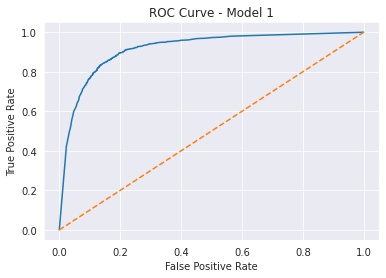

In [78]:
plt.plot(roc['fpr'], roc['tpr'])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model 1')
plt.show()

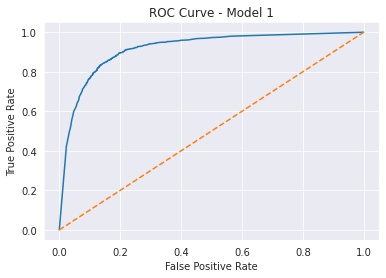

In [79]:
import seaborn as sns
sns.set_style("darkgrid")
plt.plot(roc['fpr'], roc['tpr'])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model 1')
plt.show()

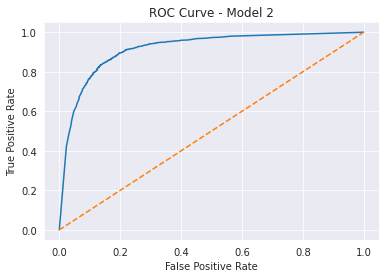

In [80]:
predictions2 = model2.predict(test, output_type='probability')
roc2 = tc.evaluation.roc_curve(test['sentiment'], predictions2)
sns.set_style("darkgrid")
plt.plot(roc['fpr'], roc['tpr'])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model 2')
plt.show()

### vii) calculate the AUC for the testing set.


In [85]:
auc = tc.evaluation.auc(test['sentiment'], predictions)
auc2 = tc.evaluation.auc(test['sentiment'], predictions2)
print("Model 1 AUC:", round(auc*100, 4), '%')
print("Model 2 AUC:", round(auc2*100, 4), '%')

Model 1 AUC: 91.0835 %
Model 2 AUC: 99.9997 %


### g) [2 marks] Select which of your two models is the best (or declare a tie) and justify your choice.

The second model is much better, al index are near to 100%, the confussion matrix also even does not have False Positive values and the acurracy is 100%. 
Definitively Model 2 is the winner

In [87]:
evaluate = model1.evaluate(test)
evaluate

{'accuracy': 0.8484,
 'auc': 0.9108351006200877,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   negative   |     positive    |  385  |
 |   positive   |     negative    |  373  |
 |   positive   |     positive    |  2183 |
 |   negative   |     negative    |  2059 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.8520686963309915,
 'log_loss': 0.6199117729159713,
 'precision': 0.8500778816199377,
 'recall': 0.8540688575899843,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+---------------------+--------------------+------+------+
 | threshold |         fpr         |        tpr         |  p   |  n   |
 +-----------+---------------------+--------------------+------+------+
 |    0.0    |        